# Restrict data and explore missing and unusual results

## Plain English Summary

tbc

## Aims

* Restrict to records from 2017 to 2019 (inclusive) and stroke teams with an average of at least 100 stroke admissions and 3 thrombolysis patients per year.
* Explore variables with missing data, to ascertain whether they are cause for concern, and identify if they would be removed for modelling (and hence, if they should be removed for bulk of descriptive analysis, so that the analysis is on a consistent dataset)
* Explore time variables with unusual values that may or may not be errors

## Observations

tbc

## Set up

In [1]:
# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Import packages and functions
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from dataclasses import dataclass

In [3]:
# Set the maximum number of columns and rows to 150
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [4]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    notebook = '01'


paths = Paths()

## Load and restrict data

Restrict to:
* Records from 2017, 2018 and 2019. **Why?** <mark>To add</mark>
* Stroke teams with at least an average of 100 stroke admissions and 3 thrombolysis patients per year - hence, removing where less than 300 admissions or 9 patients. **Why?** <mark>To add</mark>

In [5]:
# Load data
raw_data = pd.read_csv(os.path.join(paths.data_path, paths.data_filename))


# Restrict to records from 2017 to 2019
raw_data_restrict = raw_data[raw_data['year'].isin([2017, 2018, 2019])]

# Loop through name (each stroke team) and group_df (relevant rows from data)
# Identify if meet conditions and save to appropriate list
keep = []
discard = []
groups = raw_data_restrict.groupby('stroke_team')
for name, group_df in groups:
    # Skip if admissions less than 300 or thrombolysis patients less than 9
    raw_admissions = len(group_df.index)
    raw_thrombolysis_received = group_df['thrombolysis'] == 1
    if (raw_admissions < 300) or (raw_thrombolysis_received.sum() < 9):
        discard.append(group_df)
        continue
    else:
        keep.append(group_df)

# Concatenate output
data = pd.concat(keep)

In [6]:
# Printing change in number of records due to restricting years
print(f'''
Number of records per year:
{raw_data.year.value_counts().sort_index().to_string()}
Total records (all years): {len(raw_data.index)}
Total records (2017-19): {len(raw_data_restrict.index)}''')


Number of records per year:
2016    56510
2017    58983
2018    58549
2019    60413
2020    59301
2021    66625
Total records (all years): 360381
Total records (2017-19): 177945


In [7]:
# Printing number of stroke teams kept v.s. removed
print('Number of stroke teams remaining in dataset: {0}'.format(len(keep)))
print('Number of stroke teams removed from dataset: {0}'.format(len(discard)))

Number of stroke teams remaining in dataset: 114
Number of stroke teams removed from dataset: 4


#### Reflections regarding current restrictions

<mark>To consider:</mark> Bronglais Hospital have 294 admissions and 67 thrombolysis patients. Should we be including them?

In [8]:
discard_df = pd.concat(discard)
discard_summary = (discard_df.groupby('stroke_team')['thrombolysis']
                   .value_counts()
                   .reset_index(name='count'))
discard_summary.merge(
    discard_df.groupby('stroke_team').size().reset_index(name='TOTAL'))

,stroke_team,thrombolysis,count,TOTAL
0,Bronglais Hospital,0,227,294
1,Bronglais Hospital,1,67,294
2,Princess Alexandra Hospital,0,3,3
3,Princess Royal Hospital Haywards Heath,0,1,1
4,Queen's Medical Centre - Nottingham,0,10,16
5,Queen's Medical Centre - Nottingham,1,6,16


<mark>To consider:</mark> Are there other variables for which it would be relevant to filter the dataframe by, for the majority of the descriptive analysis? These could include:
* Only patients who arrived by ambulance
* Removing erroneous results
* Only the dataset that would be used in further analysis and models

In [9]:
# Arrival by ambulance
data['arrive_by_ambulance'].value_counts(normalize=True, dropna=False)

1    0.787233
0    0.212767
Name: arrive_by_ambulance, dtype: float64

## Contents of dataset

List all columns, their data types, and proportion complete

In [10]:
# List all columns and show their data types and proportion of completed data
data_type_complete = pd.DataFrame(
    {'Data type': data.dtypes,
     'Proportion complete': data.count() / data.shape[0]})

# Show all columns
data_type_complete

,Data type,Proportion complete
id,int64,1.000000
stroke_team,object,1.000000
age,float64,1.000000
male,int64,1.000000
infarction,float64,0.995958
onset_to_arrival_time,int64,1.000000
onset_known,int64,1.000000
precise_onset_known,int64,1.000000
onset_during_sleep,int64,1.000000
arrive_by_ambulance,int64,1.000000


## Missing data

In [11]:
# Just list columns with incomplete data
data_type_complete[data_type_complete['Proportion complete'] < 1]

,Data type,Proportion complete
infarction,float64,0.995958
call_to_ambulance_arrival_time,float64,0.159651
ambulance_on_scene_time,float64,0.159555
ambulance_travel_to_hospital_time,float64,0.130912
ambulance_wait_time_at_hospital,float64,0.130963
arrival_to_scan_time,float64,0.995958
scan_to_thrombolysis_time,float64,0.117069
arrival_to_thrombectomy_time,float64,0.010083
discharge_disability,float64,0.992935
disability_6_month,float64,0.298653


#### Missing data: Infarction and arrival to scan time

**How were these created?**
```
cleaned_data['infarction'] = raw_data['S2StrokeType'].map(infarction)
cleaned_data['arrival_to_scan_time'] = raw_data['ArrivaltoBrainImagingMinutes']
```

**Is this missing data a concern?**

It does not appear to be an error. There are 718 patients missing infarction and arrival to scan time - and according to the data dictionary, these are marked as missing as the patients did not receive a scan.

<mark>To consider:</mark> Should these patients be included in the dataset, if we don't know whether they had an infarction (and so can't distinguish between that and haemorrhage)? i.e. If they would be removed for modelling, should remove within bulk of descriptive analysis, otherwise the descriptive analysis is not being performed on the same dataset as the modelling

In [12]:
(data[['infarction', 'arrival_to_scan_time']]
 .isnull().value_counts().reset_index(name='count'))

,infarction,arrival_to_scan_time,count
0,False,False,176913
1,True,True,718


#### Missing data: Discharge disability

**How was this created?**

`cleaned_data['discharge_disability'] = raw_data['S7RankinDischarge']`

**Is this missing data a concern?**

These individuals are simply missing this data.

<mark>To consider:</mark> Would they be included in modelling (and hence, should they be included in bulk of descriptive analysis)?

In [13]:
data['discharge_disability'].isnull().value_counts()

False    176376
True       1255
Name: discharge_disability, dtype: int64

#### Missing data: Disability at 6 months

**How was this created?**

`cleaned_data['disability_6_month'] = raw_data['S8Rankin6Month']`

**Is this missing data a concern?**

Majority of patients are missing this variable. It can be entered if patients attended a 6-month follow-up assessment.

<mark>To consider:</mark> Should we describe this in descriptive analysis, or is it likely to be biased due to missing data and better to not included in reformat_data?

In [14]:
data['disability_6_month'].isnull().value_counts()

True     124581
False     53050
Name: disability_6_month, dtype: int64

#### Missing data: Time to treatment

**How were these created?**
```
cleaned_data['scan_to_thrombolysis_time'] = (
    raw_data['ArrivaltoThrombolysisMinutes'] -
    raw_data['ArrivaltoBrainImagingMinutes'])
cleaned_data['arrival_to_thrombectomy_time'] = (
    raw_data['ArrivaltoArterialPunctureMinutes'])
```

**Is this missing data a concern?**

Nope! Data is only missing when the treatment was not given, so this is all as anticipated.

In [15]:
(data['scan_to_thrombolysis_time']
 .isnull().groupby(data['thrombolysis'])
 .value_counts().reset_index(name='count'))

,thrombolysis,scan_to_thrombolysis_time,count
0,0,True,156836
1,1,False,20795


In [16]:
(data['arrival_to_thrombectomy_time']
 .isnull().groupby(data['thrombectomy'])
 .value_counts().reset_index(name='count'))

,thrombectomy,arrival_to_thrombectomy_time,count
0,0,True,175840
1,1,False,1791


#### Missing data: Ambulance timings

**How were these created?**

```
# Time from call connected to ambulance arrival at patient location
cleaned_data['call_to_ambulance_arrival_time'] = (
    raw_data['ArrivalPatientLocationtoArrivalMinutes'] -
    raw_data['CallConnectedtoArrivalMinutes'])

# Time that ambulance on scene at patient location
cleaned_data['ambulance_on_scene_time'] = (
       raw_data['DeparturePatientLocationtoArrivalMinutes'] -
       raw_data['ArrivalPatientLocationtoArrivalMinutes'])

# Ambulance travel time to from patient location to hospital
cleaned_data['ambulance_travel_to_hospital_time'] = (
       raw_data['WheelsStoptoArrivalMinutes'] -
       raw_data['DeparturePatientLocationtoArrivalMinutes'])

# Ambulance wait time at hospital
cleaned_data['ambulance_wait_time_at_hospital'] = (
    0 - raw_data['WheelsStoptoArrivalMinutes'])
```

**Is this missing data a concern?**

Besides cases when time is missing or present for every variable, there is:
* 5085 cases missing WheelsStoptoArrival (and therefore missing ambulance_travel_to_hospital and ambulance_wait_time_at_hospital) (true at many different hospitals)
* 21 cases missing WheelsStoptoArrival and DeparturePatientLocation
* 8> cases with other combinations

<mark>To consider:</mark>
* Should all times be set to NA in the smaller cases where some times are missing
* Are the other times still useful to include when you don't have ambulance_travel_to_hospital and ambulance_wait_time_at_hospital, or would you also set them all to NA?

In [17]:
# Extract relevant columns
new_amb_col = ['call_to_ambulance_arrival_time',
               'ambulance_on_scene_time',
               'ambulance_travel_to_hospital_time',
               'ambulance_wait_time_at_hospital']
amb_times = data[[
    'CallConnectedtoArrivalMinutes',
    'ArrivalPatientLocationtoArrivalMinutes',
    'DeparturePatientLocationtoArrivalMinutes',
    'WheelsStoptoArrivalMinutes'] + new_amb_col]

# Show combinations of missing data
(amb_times
 .isnull()
 .apply(lambda x: x.map({True: 'NaN', False: 'Time'}))
 .value_counts()
 .reset_index(name='count'))

,CallConnectedtoArrivalMinutes,ArrivalPatientLocationtoArrivalMinutes,DeparturePatientLocationtoArrivalMinutes,WheelsStoptoArrivalMinutes,call_to_ambulance_arrival_time,ambulance_on_scene_time,ambulance_travel_to_hospital_time,ambulance_wait_time_at_hospital,count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149250
1,Time,Time,Time,Time,Time,Time,Time,Time,23252
2,Time,Time,Time,NaN,Time,Time,NaN,NaN,5085
3,Time,Time,NaN,NaN,Time,NaN,NaN,NaN,21
4,Time,NaN,NaN,Time,NaN,NaN,NaN,Time,8
5,NaN,Time,NaN,NaN,NaN,NaN,NaN,NaN,5
6,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7,NaN,Time,Time,NaN,NaN,Time,NaN,NaN,3
8,NaN,Time,Time,Time,NaN,Time,Time,Time,2
9,Time,Time,NaN,Time,Time,NaN,NaN,Time,1


In [18]:
# Create new version with dataframe including the stroke team
amb_times_team = data[[
    'stroke_team',
    'CallConnectedtoArrivalMinutes',
    'ArrivalPatientLocationtoArrivalMinutes',
    'DeparturePatientLocationtoArrivalMinutes',
    'WheelsStoptoArrivalMinutes'] + new_amb_col]

# Show counts of missing WheelsStoptoArrival across different teams
amb_times_team_null = amb_times_team[
    amb_times_team['WheelsStoptoArrivalMinutes'].isnull()]
amb_times_team_null['stroke_team'].value_counts()

Salford Royal Hospital                                 3457
Queen Alexandra Hospital Portsmouth                    2854
Fairfield General Hospital                             2747
Royal Stoke University Hospital                        2664
Stepping Hill Hospital                                 2644
Princess Royal Hospital Telford                        2452
Southampton General Hospital                           2288
Norfolk and Norwich University Hospital                2269
University Hospital of North Durham                    2159
Royal Derby Hospital                                   2082
Pinderfields Hospital                                  2007
Gloucestershire Royal Hospital                         1980
New Cross Hospital                                     1976
Whiston Hospital HASU                                  1926
Royal Berkshire Hospital                               1924
Royal Hallamshire Hospital                             1921
Wycombe General Hospital                

## Unusual times: Summary

*Note: numbers here are different to those from unit testing as this calculation is performed after restriction of the dataset.*

In [19]:
# Create summary dataframe of time columns

time_cols = ['onset_to_arrival_time',
             'call_to_ambulance_arrival_time',
             'ambulance_on_scene_time',
             'ambulance_travel_to_hospital_time',
             'ambulance_wait_time_at_hospital',
             'arrival_to_scan_time',
             'scan_to_thrombolysis_time',
             'arrival_to_thrombectomy_time']

time_counts = pd.DataFrame({'Value': [
    'negative_time', 'zero_time', 'positive_time', 'missing_time',
    'min_time', 'max_time']})
for col in time_cols:
    time_counts[col] = [sum(data[col] < 0),
                        sum(data[col] == 0),
                        sum(data[col] > 0),
                        sum(data[col].isnull()),
                        data[col].min(),
                        data[col].max()]
time_counts = time_counts.set_index('Value').T
time_counts

Value,negative_time,zero_time,positive_time,missing_time,min_time,max_time
onset_to_arrival_time,1.0,22.0,177608.0,0.0,-717.0,62064145.0
call_to_ambulance_arrival_time,61.0,7.0,28291.0,149272.0,-1051185.0,5871.0
ambulance_on_scene_time,26.0,6.0,28310.0,149289.0,-63103546.0,1051214.0
ambulance_travel_to_hospital_time,51.0,46.0,23157.0,154377.0,-63106438.0,62930084.0
ambulance_wait_time_at_hospital,1338.0,2798.0,19127.0,154368.0,-89280.0,63106456.0
arrival_to_scan_time,0.0,0.0,176913.0,718.0,1.0,526050.0
scan_to_thrombolysis_time,0.0,161.0,20634.0,156836.0,0.0,656.0
arrival_to_thrombectomy_time,0.0,0.0,1791.0,175840.0,2.0,1780.0


## Unusual times: Arrival by ambulance

There are patient/s do not arrive by ambulance, but have times from ambulance arrival.

<mark>To consider:</mark> Do we (1) drop the patient/s, (2) set arrive_by_ambulance to 1, or (3) set ambulance times to NA?

In [20]:
any_amb_time_null = pd.Series(data[[
    'call_to_ambulance_arrival_time',
    'ambulance_on_scene_time',
    'ambulance_travel_to_hospital_time',
    'ambulance_wait_time_at_hospital']].isnull().any(axis=1),
    name='missing_any_ambulance_times')
(any_amb_time_null.groupby(data['arrive_by_ambulance'])
 .value_counts()
 .reset_index(name='count'))

,arrive_by_ambulance,missing_any_ambulance_times,count
0,0,True,37793
1,0,False,1
2,1,True,116586
3,1,False,23251


In [21]:
# Filter to patient/s who don't arrive by ambulance and yet have
# arrival times listed
amb_neg = data[(data['arrive_by_ambulance'] == 0) & (
    (data['call_to_ambulance_arrival_time'].notnull()) |
    (data['ambulance_on_scene_time'].notnull()) |
    (data['ambulance_travel_to_hospital_time'].notnull()) |
    (data['ambulance_wait_time_at_hospital'].notnull()))]

# Could view patient - just not printing for commit to GitHub
# amb_neg

## Unusual times: Negative times

In [22]:
time_counts['negative_time']

onset_to_arrival_time                   1.0
call_to_ambulance_arrival_time         61.0
ambulance_on_scene_time                26.0
ambulance_travel_to_hospital_time      51.0
ambulance_wait_time_at_hospital      1338.0
arrival_to_scan_time                    0.0
scan_to_thrombolysis_time               0.0
arrival_to_thrombectomy_time            0.0
Name: negative_time, dtype: float64

**Negative onset to arrival times (plus exploring what "onset unknown" actually means)**

There is one case here (more prior to restriction of dataset). In this case, the onset is unknown, onset was during sleep, and a negative onset to arrival time is provided. 

<mark>To consider:</marK> What should we do? (e.g. Remove patient, remove time, etc.)

In [23]:
# Negative onset to arrival time
onset_arrive_neg = data[data['onset_to_arrival_time'] < 0]
onset_arrive_neg[['onset_known', 'onset_during_sleep'] + time_cols]

,onset_known,onset_during_sleep,onset_to_arrival_time,call_to_ambulance_arrival_time,ambulance_on_scene_time,ambulance_travel_to_hospital_time,ambulance_wait_time_at_hospital,arrival_to_scan_time,scan_to_thrombolysis_time,arrival_to_thrombectomy_time
94341,0,1,-717,NaN,NaN,NaN,NaN,78.0,NaN,NaN


To explore this further, looked further into relationship between known onset and onset to arrival.

* Onset known is 1 when OnsetTimeType was 'Precise' or 'Best estimate', and 0 when it was 'Not known' - in response to "The time given is".
* Onset during sleep is 1 when OnsetDateType was 'Stroke during sleep', and 0 when it was 'Precise' or 'Best estimate' - in response to "The date given is".

<mark>To consider:</mark>
* "onset_known" should maybe actually be "onset_time_known", if it's always assumed that a date is known
* There are no missing times in onset_to_arrival_time, so what does it mean for an onset time to not be known, when one is used to calculate onset to arrival time anyway?

In [24]:
# Onset time known not dependent on whether onset during sleep
(data[['onset_known', 'onset_during_sleep']]
 .value_counts(dropna=False)
 .reset_index(name='count')
 .sort_values(by='onset_known'))

,onset_known,onset_during_sleep,count
1,0,0,44440
2,0,1,14233
0,1,0,108715
3,1,1,10243


In [25]:
# When onset is not known, onset to arrival time is not just negative,
# or zero or large - it spans a range of times
unknown_onset = data[data['onset_known'] == 0]
(unknown_onset[['onset_to_arrival_time']]
 .value_counts(dropna=False)
 .reset_index(name='count')
 .sort_values(by=['onset_to_arrival_time'])).head(30)

,onset_to_arrival_time,count
6635,-717,1
676,0,22
3513,1,4
3837,3,3
5489,5,2
8611,6,1
5488,7,2
4511,10,3
5487,11,2
4441,12,3


**(2b) Negative ambulance times**

For reference, how the ambulance times were created:
```
# Time from call connected to ambulance arrival at patient location
cleaned_data['call_to_ambulance_arrival_time'] = (
    raw_data['ArrivalPatientLocationtoArrivalMinutes'] -
    raw_data['CallConnectedtoArrivalMinutes'])

# Time that ambulance on scene at patient location
cleaned_data['ambulance_on_scene_time'] = (
       raw_data['DeparturePatientLocationtoArrivalMinutes'] -
       raw_data['ArrivalPatientLocationtoArrivalMinutes'])

# Ambulance travel time to from patient location to hospital
cleaned_data['ambulance_travel_to_hospital_time'] = (
       raw_data['WheelsStoptoArrivalMinutes'] -
       raw_data['DeparturePatientLocationtoArrivalMinutes'])

# Ambulance wait time at hospital
cleaned_data['ambulance_wait_time_at_hospital'] = (
    0 - raw_data['WheelsStoptoArrivalMinutes'])
```

Hence, temporarily added those variables for dataset so can explore this potential issue.

The logic of how times are created assumes:
* Arrival at hospital occurs at time 0 (and hence that times are negative)
* That each time in the sequence is less than or equal to the subsequent time

As you can see in the example below with positive times.

In [26]:
# Show positive times
amb_times[(amb_times[new_amb_col] > 0).any(axis=1)].tail(10)

,CallConnectedtoArrivalMinutes,ArrivalPatientLocationtoArrivalMinutes,DeparturePatientLocationtoArrivalMinutes,WheelsStoptoArrivalMinutes,call_to_ambulance_arrival_time,ambulance_on_scene_time,ambulance_travel_to_hospital_time,ambulance_wait_time_at_hospital
350697,-52.0,-44.0,-19.0,-9.0,8.0,25.0,10.0,9.0
352447,-49.0,-43.0,-15.0,-7.0,6.0,28.0,8.0,7.0
352661,-281.0,-63.0,-39.0,-20.0,218.0,24.0,19.0,20.0
353011,-53.0,-34.0,-21.0,-8.0,19.0,13.0,13.0,8.0
355532,-103.0,-66.0,-43.0,-13.0,37.0,23.0,30.0,13.0
356414,-63.0,-50.0,-18.0,0.0,13.0,32.0,18.0,0.0
357043,-142.0,-88.0,-49.0,-8.0,54.0,39.0,41.0,8.0
357240,-74.0,-63.0,-24.0,-4.0,11.0,39.0,20.0,4.0
357353,-174.0,-164.0,-15.0,-10.0,10.0,149.0,5.0,10.0
357625,-71.0,-63.0,-39.0,-9.0,8.0,24.0,30.0,9.0


However, we get negative times when:
* WheelsStoptoArrivalMinues is positive (as calculated by 0 - WheelsStop) (see examples where ambulance_wait_time is negative)
* A time is greater than the subsequent time in the sequence (e.g. call_to_ambulance_arrival is ArrivalPatient - CallConnected, but in table below, can see e.g. CallConnected at -47 minutes but ArrivalPatient at -231) (see examples where other ambulance times are negative)

In [27]:
# Show negative times
amb_times[(amb_times[new_amb_col] < 0).any(axis=1)].tail(10)

,CallConnectedtoArrivalMinutes,ArrivalPatientLocationtoArrivalMinutes,DeparturePatientLocationtoArrivalMinutes,WheelsStoptoArrivalMinutes,call_to_ambulance_arrival_time,ambulance_on_scene_time,ambulance_travel_to_hospital_time,ambulance_wait_time_at_hospital
266077,-47.0,-231.0,-204.0,-191.0,-184.0,27.0,13.0,191.0
272628,-52.0,-36.0,-27.0,4.0,16.0,9.0,31.0,-4.0
283548,-67.0,182.0,226.0,237.0,249.0,44.0,11.0,-237.0
295133,-62.0,695.0,745.0,748.0,757.0,50.0,3.0,-748.0
311431,-47.0,-37.0,-1458.0,-1450.0,10.0,-1421.0,8.0,1450.0
320864,-84.0,-59.0,-7.0,10.0,25.0,52.0,17.0,-10.0
326896,-46.0,-249.0,-229.0,-190.0,-203.0,20.0,39.0,190.0
332118,-58.0,55.0,74.0,89.0,113.0,19.0,15.0,-89.0
335100,-48.0,-39.0,-15.0,8.0,9.0,24.0,23.0,-8.0
338149,-37.0,-24.0,-10.0,15.0,13.0,14.0,25.0,-15.0


You can see the frequency at which this occurs below.

<mark>To consider:</mark> What should we do in these cases? I am presuming it requires removing all times for those patients?

In [28]:
(data['CallConnectedtoArrivalMinutes'] >
 data['ArrivalPatientLocationtoArrivalMinutes']).value_counts()

False    177570
True         61
dtype: int64

In [29]:
(data['ArrivalPatientLocationtoArrivalMinutes'] >
 data['DeparturePatientLocationtoArrivalMinutes']).value_counts()

False    177605
True         26
dtype: int64

In [30]:
(data['DeparturePatientLocationtoArrivalMinutes'] >
 data['WheelsStoptoArrivalMinutes']).value_counts()

False    177580
True         51
dtype: int64

In [31]:
(data['WheelsStoptoArrivalMinutes'] > 0).value_counts()

False    176293
True       1338
Name: WheelsStoptoArrivalMinutes, dtype: int64

## Unusual times: Times equal to zero

Can see frequency that times were equal to 0.

In [32]:
time_counts['zero_time']

onset_to_arrival_time                  22.0
call_to_ambulance_arrival_time          7.0
ambulance_on_scene_time                 6.0
ambulance_travel_to_hospital_time      46.0
ambulance_wait_time_at_hospital      2798.0
arrival_to_scan_time                    0.0
scan_to_thrombolysis_time             161.0
arrival_to_thrombectomy_time            0.0
Name: zero_time, dtype: float64

**(3a) Ambulance times at 0**

For the ambulance times, something is 0 if:
* WheelsStoptoArrival is 0, or
* A time is the same as its subsequent time

As can be seen above, the majority of 0s are for ambulance_wait_time_at_hospital, which is based on 0 - WheelsStop - but those cases may be more plausible, if it indicates there is no wait time, so assuming those are not erroneous.

<mark>To consider:</mark> However, what is the case for the other times (call to ambulance, time that ambulance is on scene, and ambulance travel to hospital) - as surely it is technically impossible for those to be 0 minutes?

**(3b) Onset to arrival times at 0**

<mark>To consider:</mark> For onset to arrival time, had assumed this might be 0 for patients who did not arrive by ambulance, but the majority actually did arrive by ambulance, and hence it seems very unlikely for them to have had an onset whilst already having come in by ambulance, although possible?

In [33]:
# Zero onset to arrival time
onset_arrive_zero = data[data['onset_to_arrival_time'] == 0]
onset_arrive_zero[['onset_known', 'onset_during_sleep',
                   'arrive_by_ambulance'] + time_cols]

,onset_known,onset_during_sleep,arrive_by_ambulance,onset_to_arrival_time,call_to_ambulance_arrival_time,ambulance_on_scene_time,ambulance_travel_to_hospital_time,ambulance_wait_time_at_hospital,arrival_to_scan_time,scan_to_thrombolysis_time,arrival_to_thrombectomy_time
150622,0,0,1,0,NaN,NaN,NaN,NaN,1503.0,NaN,NaN
127532,0,0,0,0,NaN,NaN,NaN,NaN,1088.0,NaN,NaN
213785,0,1,1,0,NaN,NaN,NaN,NaN,746.0,NaN,NaN
111903,0,1,1,0,NaN,NaN,NaN,NaN,877.0,NaN,NaN
296062,0,0,1,0,21.0,69.0,37.0,-870.0,1057.0,NaN,NaN
69305,0,0,1,0,NaN,NaN,NaN,NaN,44.0,NaN,NaN
89825,0,0,1,0,NaN,NaN,NaN,NaN,609.0,NaN,NaN
104361,0,0,0,0,NaN,NaN,NaN,NaN,836.0,NaN,NaN
173388,0,0,1,0,NaN,NaN,NaN,NaN,1076.0,NaN,NaN
183031,0,0,0,0,NaN,NaN,NaN,NaN,816.0,NaN,NaN


**(3c) Scan to thrombolysis time**

```
cleaned_data['scan_to_thrombolysis_time'] = (
    raw_data['ArrivaltoThrombolysisMinutes'] -
    raw_data['ArrivaltoBrainImagingMinutes'])
```

Hence, scan to thrombolysis is zero when ArrivaltoThrombolysis and ArrivaltoBrainImaging are the same value (example below). This occurs in 161 cases, with 20,634 cases of positive results, and no negative results.

<mark>To consider:</mark> Is this a valid result, to have zero time between scan and thrombolysis? Presuming it might kind of maybe be?

In [34]:
time_counts.loc['scan_to_thrombolysis_time']

Value
negative_time         0.0
zero_time           161.0
positive_time     20634.0
missing_time     156836.0
min_time              0.0
max_time            656.0
Name: scan_to_thrombolysis_time, dtype: float64

## Unusual times: Very large times

In [35]:
time_counts['max_time_hours'] = round(time_counts['max_time']/60, 2)
time_counts['max_time_weeks'] = round(time_counts['max_time']/10080, 2)
time_counts['max_time_years'] = round(time_counts['max_time']/525600, 2)
time_counts[['max_time', 'max_time_hours', 'max_time_weeks', 'max_time_years']]

Value,max_time,max_time_hours,max_time_weeks,max_time_years
onset_to_arrival_time,62064145.0,1034402.42,6157.16,118.08
call_to_ambulance_arrival_time,5871.0,97.85,0.58,0.01
ambulance_on_scene_time,1051214.0,17520.23,104.29,2.00
ambulance_travel_to_hospital_time,62930084.0,1048834.73,6243.06,119.73
ambulance_wait_time_at_hospital,63106456.0,1051774.27,6260.56,120.07
arrival_to_scan_time,526050.0,8767.50,52.19,1.00
scan_to_thrombolysis_time,656.0,10.93,0.07,0.00
arrival_to_thrombectomy_time,1780.0,29.67,0.18,0.00


**(4a) Large onset to arrival time**

<mark>To consider:</mark> A large onset to arrival time is plausible. However, some are certainly anonmalous results - but where do you draw the line? For example, 118 years between onset and arrival is impossible, but what about 10 years, or 2 years, or 1 year?

In [36]:
# Convert time from minutes to years
onset_arrival_years = data['onset_to_arrival_time']/525600

# Present counts, rounded to nearest year
round(onset_arrival_years).value_counts().sort_index()

0.0      177533
1.0          78
2.0           2
3.0           5
7.0           1
8.0           1
10.0          1
15.0          2
16.0          2
17.0          2
18.0          1
100.0         1
117.0         1
118.0         1
Name: onset_to_arrival_time, dtype: int64

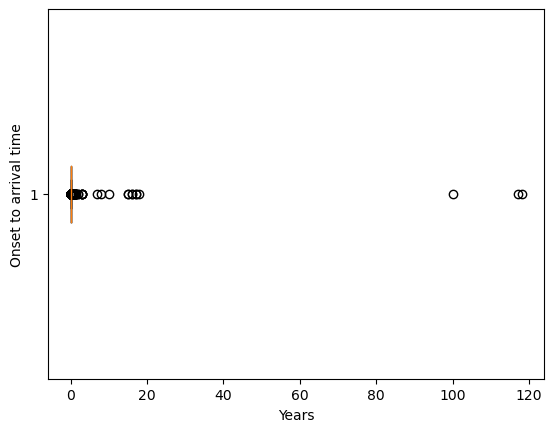

In [37]:
plt.boxplot(onset_arrival_years, vert=0)
plt.xlabel('Years')
plt.ylabel('Onset to arrival time')
plt.show()

**(4b) Large call to ambulance time**

<mark>To consider:</mark> These could be plausible - but there may be some anomalies. We incremently see times up to 24 hours, but then there is a huge leap to a single time of 98 hours. Is that plausible? Do we keep it?

In [38]:
# Convert time from minutes to years
call_amb_hours = data['call_to_ambulance_arrival_time']/60

# Filter to times that are not negative
call_amb_hours = call_amb_hours[call_amb_hours >= 0]

# Present counts, rounded to nearest year
round(call_amb_hours).value_counts().sort_index()

0.0     19850
1.0      6879
2.0       920
3.0       314
4.0       165
5.0        62
6.0        36
7.0        17
8.0        16
9.0         8
10.0        8
11.0        3
12.0        4
13.0        2
14.0        4
15.0        1
16.0        1
19.0        1
21.0        1
23.0        1
24.0        4
98.0        1
Name: call_to_ambulance_arrival_time, dtype: int64

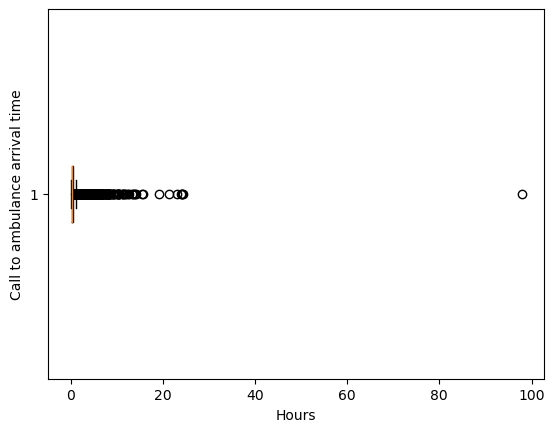

In [39]:
plt.boxplot(call_amb_hours, vert=0)
plt.xlabel('Hours')
plt.ylabel('Call to ambulance arrival time')
plt.show()

**(4c) Large ambulance on scene time**

<mark>To consider:</mark> Where do you draw the line? We increment 0-6 hours, then leap to 24, and then two totally implausible results.

In [40]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
amb_sc_hours = data['ambulance_on_scene_time']/60
amb_sc_hours = amb_sc_hours[amb_sc_hours >= 0]
round(amb_sc_hours).value_counts().sort_index()

0.0        15180
1.0        12825
2.0          278
3.0           27
4.0            2
6.0            1
24.0           1
8760.0         1
17520.0        1
Name: ambulance_on_scene_time, dtype: int64

**(4d) Large ambulance travel to hospital time**

<mark>To consider:</mark> Again, where do you draw the line?

In [41]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
amb_travel_hours = data['ambulance_travel_to_hospital_time']/60
amb_travel_hours = amb_travel_hours[amb_travel_hours >= 0]
round(amb_travel_hours).value_counts().sort_index()

0.0          19549
1.0           3630
2.0             13
10.0             3
11.0             1
24.0             4
1488.0           1
8760.0           1
1048835.0        1
Name: ambulance_travel_to_hospital_time, dtype: int64

**(4e) Large ambulance wait time at hospital**

```
# Ambulance wait time at hospital
cleaned_data['ambulance_wait_time_at_hospital'] = (
    0 - raw_data['WheelsStoptoArrivalMinutes'])
```

As in first dataframe, there are some very extreme results where the wait time is a number of weeks.

As in the second dataframe, the majority are within a few hours, but there are several that are beyond that - 14, 15, 16, 17... 20, 22, 24... 43, 44... hours. Incrementing up and up.

<mark>To consider:</mark> Again, where do you draw the line?

In [42]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
amb_travel_weeks = data['ambulance_wait_time_at_hospital']/10080
amb_travel_weeks = amb_travel_weeks[amb_travel_weeks >= 0]
pd.DataFrame(round(amb_travel_weeks).value_counts().sort_index())

,ambulance_wait_time_at_hospital
0.0,21824
1.0,27
2.0,7
3.0,9
4.0,6
9.0,1
26.0,1
52.0,1
104.0,1
6240.0,3


In [43]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
amb_travel_hours = data['ambulance_wait_time_at_hospital']/60
amb_travel_hours = amb_travel_hours[amb_travel_hours >= 0]
pd.DataFrame(round(amb_travel_hours).value_counts().sort_index())

,ambulance_wait_time_at_hospital
0.0,21089
1.0,373
2.0,59
3.0,45
4.0,37
5.0,24
6.0,24
7.0,17
8.0,22
9.0,13


**(4f) Large arrival to scan times**

`cleaned_data['arrival_to_scan_time'] = raw_data['ArrivaltoBrainImagingMinutes']`

<mark>To consider:</mark> Are all of these times plausible? Note, the first table is time in weeks

In [44]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
arrive_scan_weeks = data['arrival_to_scan_time']/10080
arrive_scan_weeks = arrive_scan_weeks[arrive_scan_weeks >= 0]
pd.DataFrame(round(arrive_scan_weeks).value_counts().sort_index())

,arrival_to_scan_time
0.0,176215
1.0,576
2.0,56
3.0,13
4.0,40
5.0,3
7.0,1
8.0,2
9.0,2
13.0,2


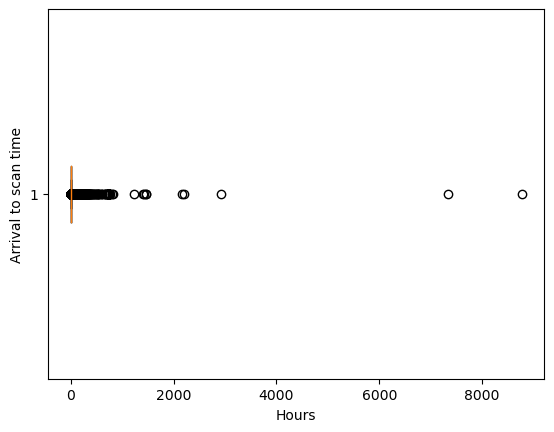

In [45]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
arrive_scan_hours = data['arrival_to_scan_time']/60
arrive_scan_hours = arrive_scan_hours[arrive_scan_hours >= 0]

plt.boxplot(arrive_scan_hours, vert=0)
plt.xlabel('Hours')
plt.ylabel('Arrival to scan time')
plt.show()

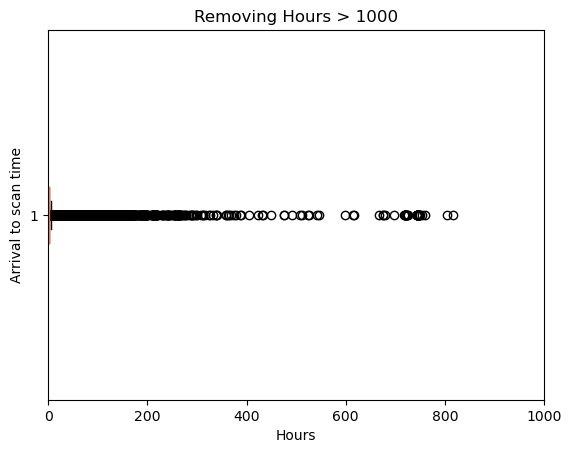

In [46]:
plt.boxplot(arrive_scan_hours, vert=0)
plt.xlabel('Hours')
plt.ylabel('Arrival to scan time')
plt.xlim([0, 1000])
plt.title('Removing Hours > 1000')
plt.show()

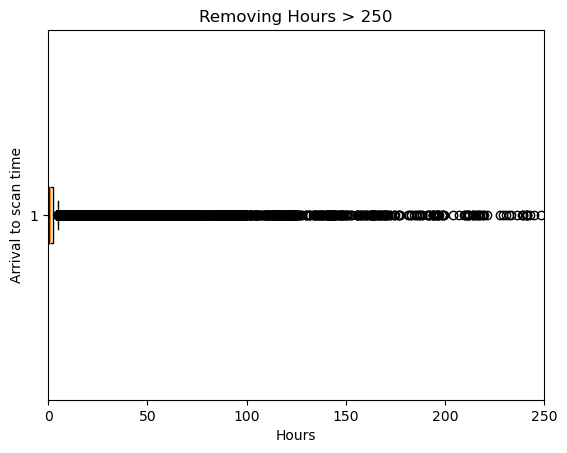

In [47]:
plt.boxplot(arrive_scan_hours, vert=0)
plt.xlabel('Hours')
plt.ylabel('Arrival to scan time')
plt.xlim([0, 250])
plt.title('Removing Hours > 250')
plt.show()

**(4g) Large scan to thrombolysis or arrival to thrombectomy times**

Both seem realistic and plausible with taper offs

In [48]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
scan_throm_hours = data['scan_to_thrombolysis_time']/60
scan_throm_hours = scan_throm_hours[scan_throm_hours >= 0]
round(scan_throm_hours).value_counts().sort_index()

0.0     10669
1.0      9180
2.0       805
3.0        94
4.0        21
5.0        14
6.0         2
8.0         5
9.0         2
10.0        2
11.0        1
Name: scan_to_thrombolysis_time, dtype: int64

In [49]:
# Convert time from minutes, filter from non-negative,
# and present counts (rounded)
arr_throm_hours = data['arrival_to_thrombectomy_time']/60
arr_throm_hours = arr_throm_hours[arr_throm_hours >= 0]
round(arr_throm_hours).value_counts().sort_index()

0.0      28
1.0     395
2.0     457
3.0     398
4.0     270
5.0     106
6.0      38
7.0      18
8.0      14
9.0       5
10.0      8
11.0      6
12.0      4
13.0      2
14.0      7
15.0      6
16.0      3
17.0      3
18.0      3
19.0      3
20.0      1
21.0      1
23.0      1
24.0      1
25.0      3
26.0      5
27.0      2
28.0      2
30.0      1
Name: arrival_to_thrombectomy_time, dtype: int64